In [1]:
import json
from glob import glob
import cv2
import matplotlib.pyplot as plt
import random
import os
import shutil
from PIL import Image

In [3]:


# imgs2= glob("../../datasets/aihub_safety/val/*/*/*.jpg") 
# imgs= glob("../../datasets/aihub_safety/val/*/*.jpg") 

jsons6= glob("../../datasets/aihub_safety/val/**/2.중장비만/*.json") 
jsons5= glob("../../datasets/aihub_safety/val/*/2.중장비만/*.json") 
jsons4= glob("../../datasets/aihub_safety/val/*/1.안전보호구만/*.json") 
jsons3= glob("../../datasets/aihub_safety/val/*/5.전체/*.json") 
jsons2= glob("../../datasets/aihub_safety/val/*/*/1.안전보호구만/*.json") 
jsons= glob("../../datasets/aihub_safety/val/*/*/5.전체/*.json") 
jsons = jsons + jsons2 + jsons3 + jsons4 + jsons5 + jsons6

# jsons= glob("../../datasets/aihub_safety/train/*/서대문/5.전체/*") 


# jsons[:3]

In [4]:
len(jsons)

32297

In [5]:
int('03')

3

In [7]:
import random
random.shuffle(jsons)

[870, 138, 948, 242]
[816, 233, 959, 427]
[834, 544, 947, 693]
[1039, 124, 1121, 227]
[950, 233, 1183, 464]
[986, 600, 1095, 779]
[1103, 160, 1163, 241]
[1124, 235, 1194, 428]
[1089, 498, 1145, 623]
[1191, 181, 1257, 275]
[1237, 148, 1330, 266]
[1186, 268, 1268, 448]
[1189, 243, 1426, 473]
[1160, 547, 1230, 681]


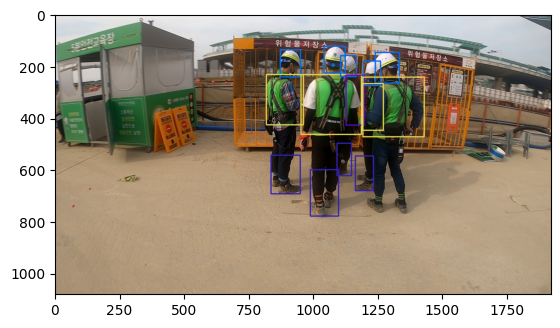

[781, 384, 852, 490]
[802, 556, 874, 637]


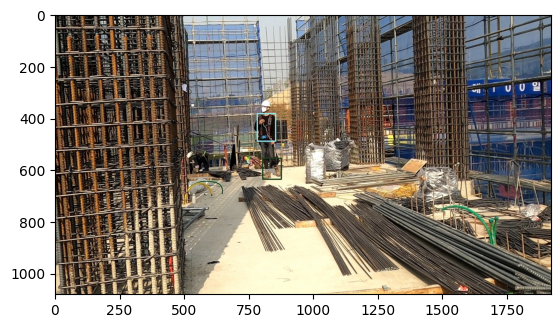

[1799, 494, 1842, 552]
[1642, 519, 1688, 565]
[1543, 608, 1587, 662]
[1816, 513, 1860, 571]
[1491, 701, 1550, 777]
[1611, 693, 1695, 802]
[1807, 697, 1893, 801]
[1622, 547, 1707, 657]
[1476, 638, 1551, 721]
[1792, 559, 1859, 639]


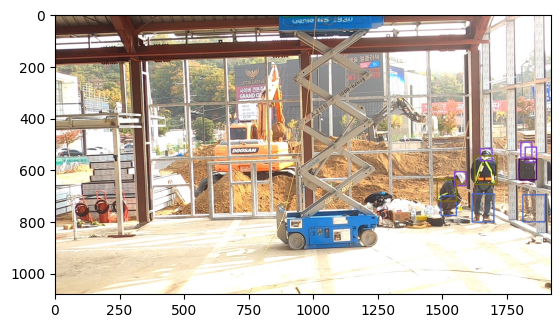

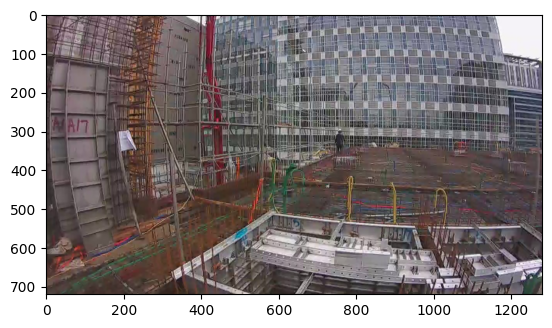

[984, 565, 1066, 666]
[1006, 697, 1064, 752]


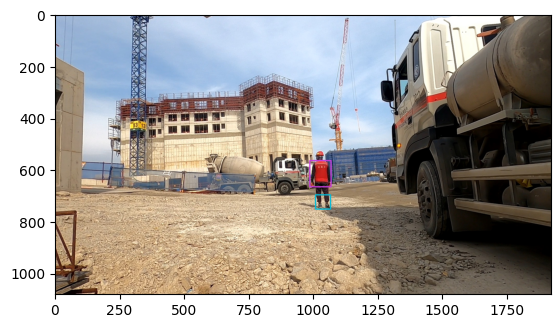

[634, 265, 721, 370]
[1137, 205, 1205, 278]
[786, 321, 825, 369]
[1194, 233, 1314, 318]
[576, 344, 735, 541]
[587, 692, 804, 858]
[775, 502, 827, 595]
[1207, 314, 1328, 383]


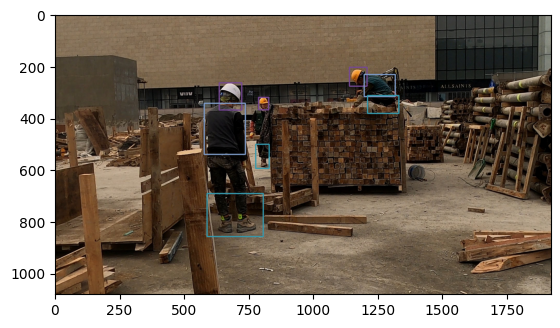

In [8]:
# IMAGE CHECK for json_format
for i,js_f in enumerate(jsons):
    
    img_f = js_f.replace('라벨','원천').replace('/5.전체','').replace('/2.중장비만','').replace('/1.안전보호구만','').replace('.json','.jpg')

    img = cv2.imread(img_f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    with open(js_f,"r") as f:
        data = json.load(f)
    annos = data['annotations']
    img_size = data['image']['resolution']
    clses = []
    colors = {}


    for anno in annos:
        
        # if anno['class'] not in ['01','02','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19']:
        #     continue
        if int(anno['class']) > 19:
            continue
        
        cls = anno['class']
        if cls not in clses:
            clses.append(cls)
            colors[cls] = tuple([random.randint(0,255) for _ in range(3)])
        try:
            xyxy = anno['box'] 
        except:
            continue
        
        
        # print(anno['class'])
        print(anno['box'])

        # print(img_size)
        # print(colors)
        # print( colors[cls])
        # box 
        img = cv2.rectangle(img , pt1=(xyxy[0],xyxy[1]),pt2=(xyxy[2],xyxy[3]),color= colors[cls], thickness=3)

    plt.imshow(img)
    plt.show()
    if i == 5:
        break



In [44]:
# cls 


오브젝트 : 안전모 착용 여부, 안전조끼 착용 여부, 안전벨트 착용 여부

cls  

0. 안전모 착용
1. 안전모 미착용
2. 안전조끼 착용
3. 안전벨트 착용
4. 조끼 & 벨트 미착용


In [29]:
len(jsons)

32297

In [32]:
set(range(19)) & set([18])

{18}

In [39]:
# JSON TO TXT (& xyxy to xywh)
# js_cls = ['01','02','07','08']
# txt_cls = ['3','4','0','1']

# mapping_cls = {js_cls[i]:txt_cls[i] for i in range(len(js_cls))}

def cvt_yoloformat(xyxy,w,h):
    box_w = xyxy[2] - xyxy[0]
    box_h = xyxy[3] - xyxy[1]
    return [(xyxy[0] + box_w/2)/w ,(xyxy[1] + box_h/2)/h, box_w/w, box_h/h ]

count = 0
con_count = 0
for j,js_f in enumerate(jsons):
    # print(js_f)
    try:
        with open(js_f,"r") as f:
            data = json.load(f)
    except:
        with open(js_f,"r",encoding='utf-8-sig') as f:
            data = json.load(f)
        
    
    annos = data['annotations']
    # print(js_f)
    
    
    clses = []
    txt_clses = []
    boxes = []
    
    # img_f = js_f.replace('라벨','원천').replace('/5.전체','').replace('.json','.jpg').replace('/1.안전보호구만','')
    # img_f = js_f.replace('라벨','원천').replace('/5.전체','').replace('.json','.jpg').replace('공동주택','공동주택_서대문').replace('/서대문','')
    img_f = js_f.replace('라벨','원천').replace('/5.전체','').replace('.json','.jpg').replace('/1.안전보호구만','').replace('/2.중장비만','')

    img = Image.open(img_f)

    for anno in annos:
        
        if int(anno['class']) > 19 :
            continue
        elif 'box' not in anno.keys():
            # print(anno.keys())
            continue
    
        cls = int(anno['class']) - 1
        clses.append(cls)
        xyxy = anno['box']
        xywh = cvt_yoloformat(xyxy,img.size[0],img.size[1])
        boxes.append(xywh)

    
    txt_cls = [j for j in clses]


    if len(set(clses) & set(range(19))) == 0:
        # print(set(clses))
        con_count += 1 
        # print(con_count)
        continue
    count += 1
    txt_f = '/media/tekim/data/tekim/datasets/aihub_safety/val_labels/' + os.path.basename(js_f)[:-4] + 'txt'

    with open(txt_f, 'w') as f:
        for i in range(len(txt_cls)):
            f.write(str(txt_cls[i]) + ' ' + str(boxes[i][0])+ ' '+ str(boxes[i][1]) + ' '+ str(boxes[i][2]) + ' '+ str(boxes[i][3]) + '\n' )

    des_dir = '/media/tekim/data/tekim/datasets/aihub_safety/val_images/'
    shutil.copy(img_f, des_dir)

    if j % 100 == 0:
        print(j,', ', count)

0 ,  1
100 ,  93
200 ,  187
300 ,  281
400 ,  373
500 ,  463
600 ,  551
700 ,  639
800 ,  730
1000 ,  915
1100 ,  1006
1200 ,  1095
1300 ,  1186
1600 ,  1457
1800 ,  1643
1900 ,  1737
2000 ,  1829
2100 ,  1920
2200 ,  2012
2300 ,  2105
2400 ,  2195
2500 ,  2291
2600 ,  2384
2700 ,  2477
2800 ,  2567
2900 ,  2656
3000 ,  2747
3100 ,  2835
3200 ,  2927
3300 ,  3019
3400 ,  3114
3500 ,  3202
3600 ,  3295
3700 ,  3389
3800 ,  3482
3900 ,  3576
4000 ,  3670
4100 ,  3763
4200 ,  3855
4400 ,  4041
4500 ,  4133
4600 ,  4220
4700 ,  4309
4800 ,  4403
4900 ,  4496
5000 ,  4588
5100 ,  4680
5200 ,  4769
5300 ,  4859
5400 ,  4949
5500 ,  5038
5600 ,  5128
5700 ,  5219
5900 ,  5406
6000 ,  5497
6200 ,  5677
6300 ,  5763
6400 ,  5849
6500 ,  5941
6700 ,  6125
6800 ,  6221
6900 ,  6312
7000 ,  6404
7100 ,  6494
7300 ,  6682
7400 ,  6766
7600 ,  6946
7700 ,  7038
7800 ,  7130
7900 ,  7220
8000 ,  7313
8100 ,  7404
8200 ,  7495
8300 ,  7585
8400 ,  7674
8500 ,  7771
8600 ,  7862
8800 ,  8042
8900 ,  81

In [9]:
jsons = glob('/mnt/ssd2/tekim/datasets/aihub_safety/labels/*')
print(jsons[0])
with open(jsons[4] , 'r')as f:
    data = f.readlines()
data

/mnt/ssd2/tekim/datasets/aihub_safety/labels/S2-N0106M00086.txt


['0 0.3416666666666667 0.5476851851851852 0.03958333333333333 0.06018518518518518\n',
 '4 0.34817708333333336 0.6555555555555556 0.0640625 0.1574074074074074\n',
 '4 0.42473958333333334 0.47175925925925927 0.06822916666666666 0.08981481481481482\n',
 '0 0.40677083333333336 0.4134259259259259 0.023958333333333335 0.05277777777777778\n',
 '4 0.6130208333333333 0.6578703703703703 0.051041666666666666 0.08796296296296297\n',
 '0 0.7049479166666667 0.5486111111111112 0.0359375 0.06759259259259259\n',
 '4 0.7098958333333333 0.6814814814814815 0.07291666666666667 0.16111111111111112\n']